<a href="https://colab.research.google.com/github/Benjamin025/Benjamin025/blob/main/Data-Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# utilizing of python to evaluate the quality of AIR.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

In [ ]:
raw_data=pd.read_csv('AirQualityUCI.csv')

In [ ]:
raw_data.head(10)

,,,,,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2,6;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578;;
10/03/2004;19.00.00;2;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255;;,NaN
10/03/2004;20.00.00;2,2;1402;88;9,0;939;131;1140;114;1555;1074;11,9;54,0;0,7502;;
10/03/2004;21.00.00;2,2;1376;80;9,2;948;172;1092;122;1584;1203;11,0;60,0;0,7867;;
10/03/2004;22.00.00;1,6;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888;;
10/03/2004;23.00.00;1,2;1197;38;4,7;750;89;1337;96;1393;949;11,2;59,2;0,7848;;
11/03/2004;00.00.00;1,2;1185;31;3,6;690;62;1462;77;1333;733;11,3;56,8;0,7603;;
11/03/2004;01.00.00;1;1136;31;3,3;672;62;1453;76;1333;730;10,7;60,0;0,7702;;,NaN
11/03/2004;02.00.00;0,9;1094;24;2,3;609;45;1579;60;1276;620;10,7;59,7;0,7648;;
11/03/2004;03.00.00;0,6;1010;19;1,7;561;-200;1705;-200;1235;501;10,3;60,2;0,7517;;


In [ ]:
raw_data.info

<bound method DataFrame.info of                                                                                                             Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2            6;1360;150;11                 9;1046;166;1056;113;1692;1268;13 6;48 9;0                                                7578;;                                                                          
10/03/2004;19.00.00;2;1292;112;9 4;955;103;1174;92;1559;972;13 3;47                             7;0  7255;;                                                NaN                                                                          
10/03/2004;20.00.00;2            2;1402;88;9                   0;939;131;1140;114;1555;1074;11  9;54 0;0                                                7502;;                                                                          
10/03/2004;21.00.00;2            2;1376;80;9                   2;948;172;1092;122;1584;1203;11  0;60 0;0                                                7867;;                                                                          
10/03/2004;22.00.00;1            6;1272;51;6                   5;836;131;1205;116;1490;1110;11  2;59 6;0                                                7888;;                                                                          
...                                                                                                                                                        ...                                                                          
;;;;;;;;;;;;;;;;                 NaN                           NaN                              NaN  NaN                                                   NaN                                                                          
                                                                                                     NaN                                                   NaN                                                                          
                                                                                                     NaN                                                   NaN                                                                          
                                                                                                     NaN                                                   NaN                                                                          
                                                                                                     NaN                                                   NaN                                                                          

[9471 rows x 1 columns]>

In [ ]:
raw_data.shape

(9471, 1)

In [ ]:
import pandas as pd

# Sample data as a string (for demonstration purposes, usually you'd load from a file)
data = """Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2    6;1360;150;11    9;1046;166;1056;113;1692;1268;13    6;48    9;0    7578;;
10/03/2004;19.00.00;2;1292;112;9    4;955;103;1174;92;1559;972;13    3;47    7;0    7255;;
10/03/2004;20.00.00;2    2;1402;88;9    0;939;131;1140;114;1555;1074;11    9;54    0;0    7502;;
10/03/2004;21.00.00;2    2;1376;80;9    2;948;172;1092;122;1584;1203;11    0;60    0;0    7867;;
10/03/2004;22.00.00;1    6;1272;51;6    5;836;131;1205;116;1490;1110;11    2;59    6;0    7888;;
10/03/2004;23.00.00;1    2;1197;38;4    7;750;89;1337;96;1393;949;11    2;59    2;0    7848;;
11/03/2004;00.00.00;1    2;1185;31;3    6;690;62;1462;77;1333;733;11    3;56    8;0    7603;;
11/03/2004;01.00.00;1;1136;31;3    3;672;62;1453;76;1333;730;10    7;60    0;0    7702;;
11/03/2004;02.00.00;0    9;1094;24;2    3;609;45;1579;60;1276;620;10    7;59    7;0    7648;;
11/03/2004;03.00.00;0    6;1010;19;1    7;561;-200;1705;-200;1235;501;10    3;60    2;0    ;;
"""

# Convert the string data to a StringIO object to simulate reading from a file
from io import StringIO
data_io = StringIO(data)

# Load the data into a pandas DataFrame
df1 = pd.read_csv(data_io, delimiter=';', skipinitialspace=True)

# Display the first few rows of the dataframe to see how it looks
print(df.head())

# Remove any trailing or leading whitespaces from column names
df1.columns = df1.columns.str.strip()

# Attempt to clean up and convert any columns with mixed data types (due to irregular spacing)
for col in df1.columns:
    df1[col] = df1[col].apply(lambda x: str(x).replace('\t', ' ').replace(' ', ''))  # Replace tabs and spaces with no space

# Convert numeric columns back to their proper types if necessary
df1= df1.apply(pd.to_numeric, errors='ignore')

# Display the cleaned-up dataframe
print(df1.head())


            CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
Date                                                                          
2004-03-10      26         1360       150       119           1046      166   
2004-03-10       2         1292       112        94            955      103   
2004-03-10      22         1402        88        90            939      131   
2004-03-10      22         1376        80        92            948      172   
2004-03-10      16         1272        51        65            836      131   

            PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)    T   RH    AH  
Date                                                                          
2004-03-10          1056      113          1692         1268  136  489  7578  
2004-03-10          1174       92          1559          972  133  477  7255  
2004-03-10          1140      114          1555         1074  119  540  7502  
2004-03-10          1092      122          1584    

In [ ]:
df1.shape

(10, 17)

In [ ]:
df1.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,26,1360,150,119,1046,166,1056,113,1692,1268,136,489,7578,nan,nan
1,10/03/2004,19.00.00,2,1292,112,94,955,103,1174,92,1559,972,133,477,7255,nan,nan
2,10/03/2004,20.00.00,22,1402,88,90,939,131,1140,114,1555,1074,119,540,7502,nan,nan
3,10/03/2004,21.00.00,22,1376,80,92,948,172,1092,122,1584,1203,110,600,7867,nan,nan
4,10/03/2004,22.00.00,16,1272,51,65,836,131,1205,116,1490,1110,112,596,7888,nan,nan
5,10/03/2004,23.00.00,12,1197,38,47,750,89,1337,96,1393,949,112,592,7848,nan,nan
6,11/03/2004,00.00.00,12,1185,31,36,690,62,1462,77,1333,733,113,568,7603,nan,nan
7,11/03/2004,01.00.00,1,1136,31,33,672,62,1453,76,1333,730,107,600,7702,nan,nan
8,11/03/2004,02.00.00,9,1094,24,23,609,45,1579,60,1276,620,107,597,7648,nan,nan
9,11/03/2004,03.00.00,6,1010,19,17,561,-200,1705,-200,1235,501,103,602,0,nan,nan


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           10 non-null     object
 1   Time           10 non-null     object
 2   CO(GT)         10 non-null     int64 
 3   PT08.S1(CO)    10 non-null     int64 
 4   NMHC(GT)       10 non-null     int64 
 5   C6H6(GT)       10 non-null     int64 
 6   PT08.S2(NMHC)  10 non-null     int64 
 7   NOx(GT)        10 non-null     int64 
 8   PT08.S3(NOx)   10 non-null     int64 
 9   NO2(GT)        10 non-null     int64 
 10  PT08.S4(NO2)   10 non-null     int64 
 11  PT08.S5(O3)    10 non-null     int64 
 12  T              10 non-null     int64 
 13  RH             10 non-null     int64 
 14  AH             10 non-null     int64 
 15  Unnamed: 15    10 non-null     object
 16  Unnamed: 16    10 non-null     object
dtypes: int64(13), object(4)
memory usage: 1.5+ KB


In [ ]:
df1.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,26,1360,150,119,1046,166,1056,113,1692,1268,136,489,7578,nan,nan
1,10/03/2004,19.00.00,2,1292,112,94,955,103,1174,92,1559,972,133,477,7255,nan,nan
2,10/03/2004,20.00.00,22,1402,88,90,939,131,1140,114,1555,1074,119,540,7502,nan,nan
3,10/03/2004,21.00.00,22,1376,80,92,948,172,1092,122,1584,1203,110,600,7867,nan,nan
4,10/03/2004,22.00.00,16,1272,51,65,836,131,1205,116,1490,1110,112,596,7888,nan,nan
5,10/03/2004,23.00.00,12,1197,38,47,750,89,1337,96,1393,949,112,592,7848,nan,nan
6,11/03/2004,00.00.00,12,1185,31,36,690,62,1462,77,1333,733,113,568,7603,nan,nan
7,11/03/2004,01.00.00,1,1136,31,33,672,62,1453,76,1333,730,107,600,7702,nan,nan
8,11/03/2004,02.00.00,9,1094,24,23,609,45,1579,60,1276,620,107,597,7648,nan,nan
9,11/03/2004,03.00.00,6,1010,19,17,561,-200,1705,-200,1235,501,103,602,0,nan,nan


In [ ]:
df1.shape

(10, 17)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           10 non-null     object
 1   Time           10 non-null     object
 2   CO(GT)         10 non-null     int64 
 3   PT08.S1(CO)    10 non-null     int64 
 4   NMHC(GT)       10 non-null     int64 
 5   C6H6(GT)       10 non-null     int64 
 6   PT08.S2(NMHC)  10 non-null     int64 
 7   NOx(GT)        10 non-null     int64 
 8   PT08.S3(NOx)   10 non-null     int64 
 9   NO2(GT)        10 non-null     int64 
 10  PT08.S4(NO2)   10 non-null     int64 
 11  PT08.S5(O3)    10 non-null     int64 
 12  T              10 non-null     int64 
 13  RH             10 non-null     int64 
 14  AH             10 non-null     int64 
 15  Unnamed: 15    10 non-null     object
 16  Unnamed: 16    10 non-null     object
dtypes: int64(13), object(4)
memory usage: 1.5+ KB


In [ ]:
# Check for null values in the DataFrame
print(df1.isnull().sum())


Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Unnamed: 15      0
Unnamed: 16      0
dtype: int64


In [ ]:
# Convert 'Date' and 'Time' to datetime
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y', errors='coerce')
df1['Time'] = pd.to_datetime(df1['Time'], format='%H.%M.%S', errors='coerce').dt.time

# Display the DataFrame to verify changes
print(df1.dtypes)
print(df1.head())


Date             datetime64[ns]
Time                     object
CO(GT)                    int64
PT08.S1(CO)               int64
NMHC(GT)                  int64
C6H6(GT)                  int64
PT08.S2(NMHC)             int64
NOx(GT)                   int64
PT08.S3(NOx)              int64
NO2(GT)                   int64
PT08.S4(NO2)              int64
PT08.S5(O3)               int64
T                         int64
RH                        int64
AH                        int64
Unnamed: 15              object
Unnamed: 16              object
dtype: object
        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0 2004-03-10  18:00:00      26         1360       150       119   
1 2004-03-10  19:00:00       2         1292       112        94   
2 2004-03-10  20:00:00      22         1402        88        90   
3 2004-03-10  21:00:00      22         1376        80        92   
4 2004-03-10  22:00:00      16         1272        51        65   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)

In [ ]:
df1.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-03-10,18:00:00,26,1360,150,119,1046,166,1056,113,1692,1268,136,489,7578,nan,nan
1,2004-03-10,19:00:00,2,1292,112,94,955,103,1174,92,1559,972,133,477,7255,nan,nan
2,2004-03-10,20:00:00,22,1402,88,90,939,131,1140,114,1555,1074,119,540,7502,nan,nan
3,2004-03-10,21:00:00,22,1376,80,92,948,172,1092,122,1584,1203,110,600,7867,nan,nan
4,2004-03-10,22:00:00,16,1272,51,65,836,131,1205,116,1490,1110,112,596,7888,nan,nan
5,2004-03-10,23:00:00,12,1197,38,47,750,89,1337,96,1393,949,112,592,7848,nan,nan
6,2004-03-11,00:00:00,12,1185,31,36,690,62,1462,77,1333,733,113,568,7603,nan,nan
7,2004-03-11,01:00:00,1,1136,31,33,672,62,1453,76,1333,730,107,600,7702,nan,nan
8,2004-03-11,02:00:00,9,1094,24,23,609,45,1579,60,1276,620,107,597,7648,nan,nan
9,2004-03-11,03:00:00,6,1010,19,17,561,-200,1705,-200,1235,501,103,602,0,nan,nan


In [ ]:
# Set 'Date' as the index
df1.set_index('Date', inplace=True)



In [ ]:
df1.head(10)

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
Date,,,,,,,,,,,,,,,,
2004-03-10,18:00:00,26,1360,150,119,1046,166,1056,113,1692,1268,136,489,7578,nan,nan
2004-03-10,19:00:00,2,1292,112,94,955,103,1174,92,1559,972,133,477,7255,nan,nan
2004-03-10,20:00:00,22,1402,88,90,939,131,1140,114,1555,1074,119,540,7502,nan,nan
2004-03-10,21:00:00,22,1376,80,92,948,172,1092,122,1584,1203,110,600,7867,nan,nan
2004-03-10,22:00:00,16,1272,51,65,836,131,1205,116,1490,1110,112,596,7888,nan,nan
2004-03-10,23:00:00,12,1197,38,47,750,89,1337,96,1393,949,112,592,7848,nan,nan
2004-03-11,00:00:00,12,1185,31,36,690,62,1462,77,1333,733,113,568,7603,nan,nan
2004-03-11,01:00:00,1,1136,31,33,672,62,1453,76,1333,730,107,600,7702,nan,nan
2004-03-11,02:00:00,9,1094,24,23,609,45,1579,60,1276,620,107,597,7648,nan,nan


In [ ]:
df1.shape

(10, 16)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2004-03-10 to 2004-03-11
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Time           10 non-null     object
 1   CO(GT)         10 non-null     int64 
 2   PT08.S1(CO)    10 non-null     int64 
 3   NMHC(GT)       10 non-null     int64 
 4   C6H6(GT)       10 non-null     int64 
 5   PT08.S2(NMHC)  10 non-null     int64 
 6   NOx(GT)        10 non-null     int64 
 7   PT08.S3(NOx)   10 non-null     int64 
 8   NO2(GT)        10 non-null     int64 
 9   PT08.S4(NO2)   10 non-null     int64 
 10  PT08.S5(O3)    10 non-null     int64 
 11  T              10 non-null     int64 
 12  RH             10 non-null     int64 
 13  AH             10 non-null     int64 
 14  Unnamed: 15    10 non-null     object
 15  Unnamed: 16    10 non-null     object
dtypes: int64(13), object(3)
memory usage: 1.3+ KB


In [ ]:
df1.drop('Time', axis=1, inplace=True)

In [ ]:
df1.head(10)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
Date,,,,,,,,,,,,,,,
2004-03-10,26,1360,150,119,1046,166,1056,113,1692,1268,136,489,7578,nan,nan
2004-03-10,2,1292,112,94,955,103,1174,92,1559,972,133,477,7255,nan,nan
2004-03-10,22,1402,88,90,939,131,1140,114,1555,1074,119,540,7502,nan,nan
2004-03-10,22,1376,80,92,948,172,1092,122,1584,1203,110,600,7867,nan,nan
2004-03-10,16,1272,51,65,836,131,1205,116,1490,1110,112,596,7888,nan,nan
2004-03-10,12,1197,38,47,750,89,1337,96,1393,949,112,592,7848,nan,nan
2004-03-11,12,1185,31,36,690,62,1462,77,1333,733,113,568,7603,nan,nan
2004-03-11,1,1136,31,33,672,62,1453,76,1333,730,107,600,7702,nan,nan
2004-03-11,9,1094,24,23,609,45,1579,60,1276,620,107,597,7648,nan,nan


In [ ]:
df1.drop('Unnamed: 15', axis=1, inplace=True)

In [ ]:
df1.drop('Unnamed: 16', axis=1, inplace=True)

In [ ]:
df1.shape

(10, 13)

In [ ]:
df1.head(10)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
2004-03-10,26,1360,150,119,1046,166,1056,113,1692,1268,136,489,7578
2004-03-10,2,1292,112,94,955,103,1174,92,1559,972,133,477,7255
2004-03-10,22,1402,88,90,939,131,1140,114,1555,1074,119,540,7502
2004-03-10,22,1376,80,92,948,172,1092,122,1584,1203,110,600,7867
2004-03-10,16,1272,51,65,836,131,1205,116,1490,1110,112,596,7888
2004-03-10,12,1197,38,47,750,89,1337,96,1393,949,112,592,7848
2004-03-11,12,1185,31,36,690,62,1462,77,1333,733,113,568,7603
2004-03-11,1,1136,31,33,672,62,1453,76,1333,730,107,600,7702
2004-03-11,9,1094,24,23,609,45,1579,60,1276,620,107,597,7648


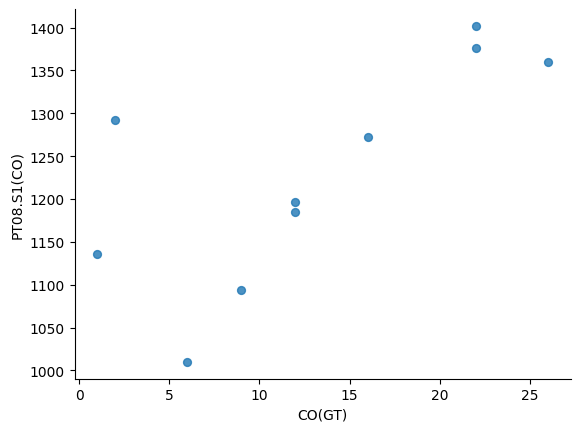

In [ ]:
# @title CO(GT) vs PT08.S1(CO)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='CO(GT)', y='PT08.S1(CO)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df2=pd.read_excel("/content/AirQualityUCI.xlsx")

In [ ]:
df2.shape

(9357, 15)

In [ ]:
df2.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


In [ ]:
df2.drop('Time', axis=1, inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   CO(GT)         9357 non-null   float64       
 2   PT08.S1(CO)    9357 non-null   float64       
 3   NMHC(GT)       9357 non-null   int64         
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 1023.5 KB


In [ ]:
df2.head(10)

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,2004-03-10,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,2004-03-11,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,2004-03-11,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,2004-03-11,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,2004-03-11,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


In [ ]:
# Set 'Date' as the index
df2.set_index('Date', inplace=True)


In [ ]:
df2.shape

(9357, 13)

In [ ]:
df1.shape

(10, 13)

In [ ]:
df=  pd.concat([df1, df2], ignore_index=True)

In [ ]:
df.shape

(9367, 13)

In [ ]:
# Save DataFrame to a CSV file
file_path = 'dataframe.csv'
df.to_csv(file_path, index=False)

# Download the file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head(10)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,26.0,1360.0,150,119.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,136.0,489.0,7578.0
1,2.0,1292.0,112,94.0,955.0,103.0,1174.0,92.0,1559.0,972.0,133.0,477.0,7255.0
2,22.0,1402.0,88,90.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,119.0,540.0,7502.0
3,22.0,1376.0,80,92.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,110.0,600.0,7867.0
4,16.0,1272.0,51,65.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,112.0,596.0,7888.0
5,12.0,1197.0,38,47.0,750.0,89.0,1337.0,96.0,1393.0,949.0,112.0,592.0,7848.0
6,12.0,1185.0,31,36.0,690.0,62.0,1462.0,77.0,1333.0,733.0,113.0,568.0,7603.0
7,1.0,1136.0,31,33.0,672.0,62.0,1453.0,76.0,1333.0,730.0,107.0,600.0,7702.0
8,9.0,1094.0,24,23.0,609.0,45.0,1579.0,60.0,1276.0,620.0,107.0,597.0,7648.0
9,6.0,1010.0,19,17.0,561.0,-200.0,1705.0,-200.0,1235.0,501.0,103.0,602.0,0.0


In [ ]:
df.tail(10)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,0.5,888.25,-200,1.307608,528.00,76.5,1076.50,53.1,987.00,577.50,10.400000,59.875000,0.754964
9358,1.1,1030.50,-200,4.359341,730.25,182.2,760.00,93.0,1129.00,905.00,9.550000,63.150000,0.753129
9359,4.0,1383.50,-200,17.364240,1220.75,593.7,470.25,154.6,1600.00,1457.25,9.675000,61.924999,0.744608
9360,5.0,1446.00,-200,22.393233,1361.50,586.2,414.75,173.6,1776.50,1704.50,13.550000,48.875000,0.755337
9361,3.9,1296.50,-200,13.552393,1102.00,522.7,506.75,186.5,1375.25,1582.50,18.150001,36.275001,0.748652
9362,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850000,29.250000,0.756824
9363,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325000,23.725000,0.711864
9364,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900000,18.350000,0.640649
9365,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325000,13.550000,0.513866
9366,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500000,13.125000,0.502804
